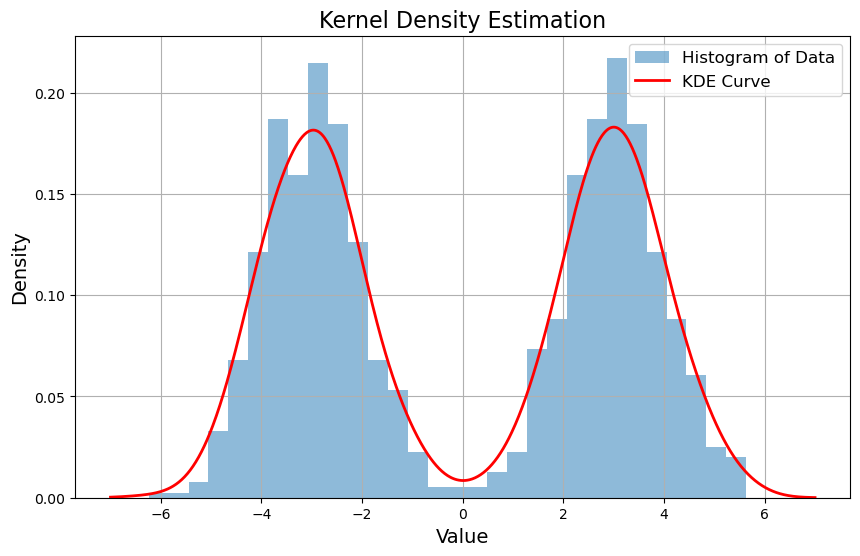

In [2]:
#1 Question 1: Develop a code to demonstrate Kernel Density Estimation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=-3, scale=1, size=500),
    np.random.normal(loc=3, scale=1, size=500)
])

data = data[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)
x_plot = np.linspace(-7, 7, 1000)[:, np.newaxis]
log_density = kde.score_samples(x_plot)
density = np.exp(log_density)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram of Data')
plt.plot(x_plot[:, 0], density, label='KDE Curve', color='red', linewidth=2)
plt.title('Kernel Density Estimation', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


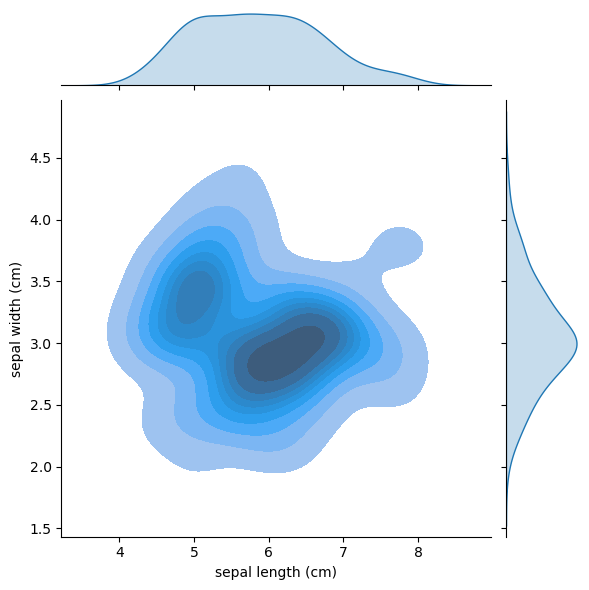

In [3]:
#Question 2: Develop a code to plot bivariate distribution considering a suitable data set available on the open source
 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Plot bivariate distribution
sns.jointplot(data=df, x=df.columns[0], y=df.columns[1], kind="kde", fill=True)
plt.show()


In [6]:
#Question 3: Develop a code to showcase various Geospatial data also make use of Bokeh to make it more interactive.
!pip install geopandas bokeh



  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/26/0c/b084e8839a117eaad8cb4fbaa81bbb24c6f183de0ee95c6c4e2770ab6f09/pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------------------------ --------- 245.8/323.6 kB 7.6 MB/s eta 0:00:01
  

In [8]:
!pip install geodatasets


  Obtaining dependency information for geodatasets from https://files.pythonhosted.org/packages/9d/dd/e30e144271280d263c0c10f34fbcf2e09e9a82bd11a165c5f1f498899a29/geodatasets-2024.8.0-py3-none-any.whl.metadata


In [11]:
import geodatasets

# List all available datasets
print(geodatasets.data)


{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip', 'license': 'NA', 'attribution': 'Center for Spatial Data Science, University of Chicago', 'name': 'geoda.airbnb', 'description': 'Airbnb rentals, socioeconomics, and crime in Chicago', 'geometry_type': 'Polygon', 'nrows': 77, 'ncols': 21, 'details': 'https://geodacenter.github.io/data-and-lab//airbnb/', 'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824', 'filename': 'airbnb.zip'}, 'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip', 'license': 'NA', 'attribution': 'Center for Spatial Data Science, University of Chicago', 'name': 'geoda.atlanta', 'description': 'Atlanta, GA region homicide counts and rates', 'geometry_type': 'Polygon', 'nrows': 90, 'ncols': 24, 'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/', 'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09', 'filename': 'atlanta_hom.zip', 'me

In [15]:
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource
import pandas as pd

# Sample geospatial data
data = {'lat': [37.7749, 40.7128, 34.0522], 'lon': [-122.4194, -74.0060, -118.2437]}
df = pd.DataFrame(data)

# Convert latitude and longitude to web mercator coordinates
df['x'] = df['lon'] * (20037508.34 / 180)
df['y'] = pd.np.log(pd.np.tan((90 + df['lat']) * pd.np.pi / 360.0)) * (20037508.34 / pd.np.pi)

# Create Bokeh plot
tile_provider = get_provider(Vendors.CARTODBPOSITRON)
p = figure(x_axis_type="mercator", y_axis_type="mercator", title="Geospatial Visualization")
p.add_tile(tile_provider)

source = ColumnDataSource(df)
p.circle(x='x', y='y', size=10, fill_color="blue", source=source)

show(p)


C:\Users\Abhishek P\AppData\Local\Temp\ipykernel_14904\2824384301.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['y'] = pd.np.log(pd.np.tan((90 + df['lat']) * pd.np.pi / 360.0)) * (20037508.34 / pd.np.pi)


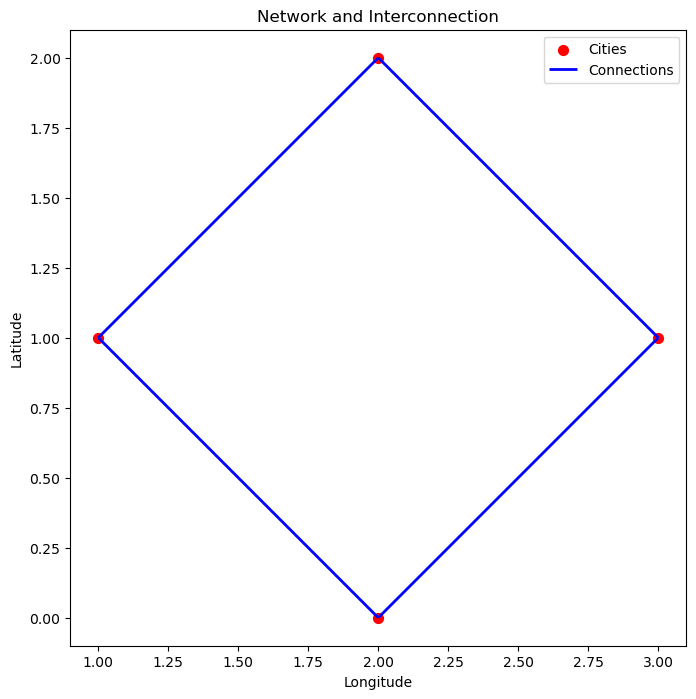

In [16]:
#Question 4 : Develop a code to plot network and interconnection using geospatial data
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Sample geospatial data (replace with your data)
cities = gpd.GeoDataFrame({
    'city': ['City A', 'City B', 'City C', 'City D'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 1), Point(2, 0)],
})

connections = [
    ('City A', 'City B'),
    ('City B', 'City C'),
    ('City C', 'City D'),
    ('City D', 'City A'),
]

# Create LineString geometries for connections
lines = []
for city1, city2 in connections:
    point1 = cities[cities['city'] == city1].geometry.iloc[0]
    point2 = cities[cities['city'] == city2].geometry.iloc[0]
    line = LineString([point1, point2])
    lines.append(line)

# Create GeoDataFrame for connections
connections_gdf = gpd.GeoDataFrame({'geometry': lines})

# Plot the data
fig, ax = plt.subplots(figsize=(8, 8))
cities.plot(ax=ax, marker='o', color='red', markersize=50, label='Cities')
connections_gdf.plot(ax=ax, color='blue', linewidth=2, label='Connections')

# Customize the plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Network and Interconnection')
ax.legend()
plt.show()

In [17]:
#Question 5: Develop a code showcase networked program including retrieving image over HTTP, parsing HTML and scraping the web

!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import os
import shutil
url = "https://en.wikipedia.org/wiki/Main_Page"  # Wikipedia main page
response = requests.get(url)
if response.status_code == 200:
    print("Website fetched successfully.")
else:
    print(f"Failed to fetch the website. Status code: {response.status_code}")
    exit()
soup = BeautifulSoup(response.content, 'html.parser')
image_tag = soup.find('img')
if image_tag and 'src' in image_tag.attrs:
    image_url = image_tag['src']
    if not image_url.startswith('http'):  # Handle relative URLs
        image_url = requests.compat.urljoin(url, image_url)
    print(f"Image URL: {image_url}")
else:
    print("No image found on the page.")
    exit()
image_response = requests.get(image_url, stream=True)
if image_response.status_code == 200:
    print("Image retrieved successfully.")
    # Step 6: Save the image locally
    image_filename = os.path.basename(image_url)
    with open(image_filename, 'wb') as f:
        shutil.copyfileobj(image_response.raw, f)
    print(f"Image saved as {image_filename}.")
else:
    print(f"Failed to fetch the image. Status code: {image_response.status_code}")

print("\nExtracting all hyperlinks from the page:")
for link in soup.find_all('a', href=True):
    href = link['href']
    full_url = requests.compat.urljoin(url, href)  # Handle relative URLs
    print(full_url)


Website fetched successfully.
Image URL: https://en.wikipedia.org/static/images/icons/wikipedia.png
Image retrieved successfully.
Image saved as wikipedia.png.

Extracting all hyperlinks from the page:
https://en.wikipedia.org/wiki/Main_Page#bodyContent
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Wikipedia:Contents
https://en.wikipedia.org/wiki/Portal:Current_events
https://en.wikipedia.org/wiki/Special:Random
https://en.wikipedia.org/wiki/Wikipedia:About
https://en.wikipedia.org/wiki/Wikipedia:Contact_us
https://en.wikipedia.org/wiki/Help:Contents
https://en.wikipedia.org/wiki/Help:Introduction
https://en.wikipedia.org/wiki/Wikipedia:Community_portal
https://en.wikipedia.org/wiki/Special:RecentChanges
https://en.wikipedia.org/wiki/Wikipedia:File_upload_wizard
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Special:Search
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
https://en

In [18]:
#Question 6: Develop a code to showcase the web services including eXtensible Markup Language

import requests
import xml.etree.ElementTree as ET

# Sample XML-based web service
url = "https://www.w3schools.com/xml/simple.xml"
response = requests.get(url)

# Parse the XML response
root = ET.fromstring(response.content)

# Print XML data
for food in root.findall('food'):
    name = food.find('name').text
    price = food.find('price').text
    print(f"{name}: {price}")


Belgian Waffles: $5.95
Strawberry Belgian Waffles: $7.95
Berry-Berry Belgian Waffles: $8.95
French Toast: $4.50
Homestyle Breakfast: $6.95
